# Potential Climate Change Impact

### Let's Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy import stats
import seaborn as sns

In [2]:
import os

# This is my file path for the lab works
os.chdir("C:/Users/bahra/Desktop/Mina-Climate")

# Read the dataset

In [3]:
# Let's read the data
df = pd.read_csv("egyptclimate.csv")
# Let's see what we have

# df['Date'] = df['Date'].apply(str)
df.columns = df.columns.astype(str)
df

,Date,Mean temp,Max temp,Mini temp,Priciptation (mm),CO2 (million tone),Sea level (mm),Wheat Yied (Mt),Rice Yied (Mt),Cotton Yied (Mt),Moratlity under 5 years (No deaths/1000 births)
0,2008.0,23.42,30.78,16.12,17.65,194.76,55.46,8.0,6.9,0.32,16.9
1,2009.0,23.27,30.68,15.91,11.26,203.17,71.81,8.5,7.3,0.28,18.7
2,2010.0,24.56,31.92,17.26,11.24,200.84,116.04,7.2,5.5,0.38,19.1
3,2011.0,22.84,30.14,15.59,16.06,213.03,51.48,8.4,4.3,0.63,19.7
4,2012.0,23.48,30.82,16.20,17.25,213.73,79.83,8.8,5.7,0.29,19.1
5,2013.0,23.40,30.81,16.04,21.25,211.42,77.55,9.5,5.9,0.25,18.9
6,2014.0,23.65,30.94,16.40,21.12,226.90,82.33,9.3,5.7,0.31,20.3
7,2015.0,23.44,30.80,16.13,20.42,224.48,76.96,9.6,5.5,0.16,19.6
8,2016.0,23.80,31.09,16.56,15.70,239.39,80.18,9.3,4.8,0.10,19.5
9,2017.0,23.31,30.71,15.95,10.88,260.11,83.40,8.4,5.3,0.03,20.0


# Basic Data Cleaning

In [4]:
# df1 = df.drop([13,'r2'])
df = df.dropna()
df.Date = df.Date.astype(int)
# df = df.set_index('Date')

C:\Users\bahra\AppData\Local\Temp\ipykernel_28044\571329156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date = df.Date.astype(int)


# Basic Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 11 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Date                                             13 non-null     int32  
 1   Mean temp                                        13 non-null     float64
 2   Max temp                                         13 non-null     float64
 3   Mini temp                                        13 non-null     float64
 4   Priciptation (mm)                                13 non-null     float64
 5   CO2 (million tone)                               13 non-null     float64
 6   Sea level (mm)                                   13 non-null     float64
 7   Wheat Yied (Mt)                                  13 non-null     float64
 8   Rice Yied (Mt)                                   13 non-null     float64
 9   Cotton Yied (Mt)                  

In [6]:
# dummies = pd.get_dummies(df.Date)
# dummies.head(3)

In [7]:
# df2 = pd.concat([df,dummies],axis='columns')
# df2.head()

# Basic EDA (Exploratory data analysis) 

**Scatter Plot for Sea Level Rise**

<AxesSubplot:xlabel='Date', ylabel='Sea level (mm)'>

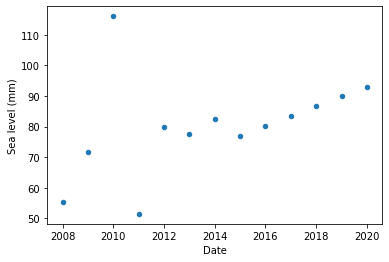

In [8]:
df.plot.scatter(x='Date', y='Sea level (mm)')
# df.plot.scatter(x='Date', y='Sea level (mm)',c='Mean temp',colormap='viridis')
# df.plot.scatter(x='Date', y='Sea level (mm)',c='Priciptation (mm)',colormap='viridis')

**Barchart for Sea Level Rise**

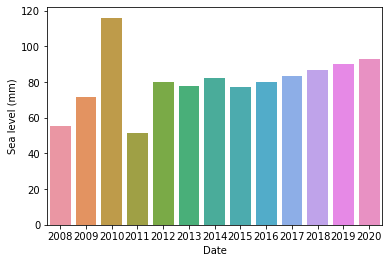

In [9]:
sns.barplot(data=df, x="Date", y="Sea level (mm)")
plt.savefig('save_as_a_png.jpg')

**Scatter Plot for Wheat Yied (Mt)**

<AxesSubplot:xlabel='Date', ylabel='Wheat Yied (Mt)'>

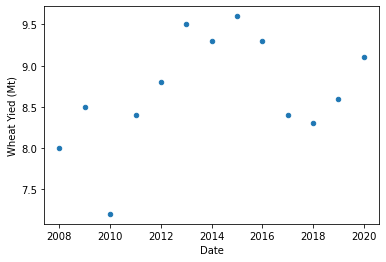

In [10]:
df.plot.scatter(x='Date', y='Wheat Yied (Mt)')
# df.plot.scatter(x='Date', y='Wheat Yied (Mt)',c='Mean temp',colormap='viridis')
# df.plot.scatter(x='Date', y='Wheat Yied (Mt)',c='Priciptation (mm)',colormap='viridis')

**Barchart for Wheat Yied (Mt)**

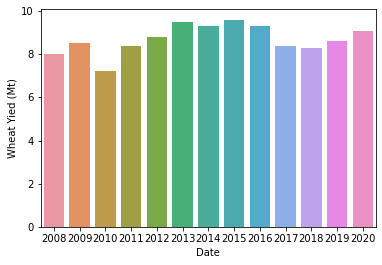

In [11]:
sns.barplot(data=df, x="Date", y="Wheat Yied (Mt)")
plt.savefig('save_as_a_png.jpg')

**Scatter Plot for Rice Yied (Mt)**

<AxesSubplot:xlabel='Date', ylabel='Rice Yied (Mt)'>

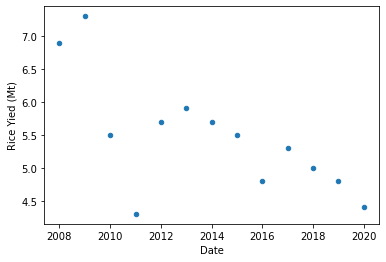

In [12]:
df.plot.scatter(x='Date', y='Rice Yied (Mt)')
# df.plot.scatter(x='Date', y='Rice Yied (Mt)',c='Mean temp',colormap='viridis')
# df.plot.scatter(x='Date', y='Rice Yied (Mt)',c='Priciptation (mm)',colormap='viridis')

**Barchart for Rice Yied (Mt)**

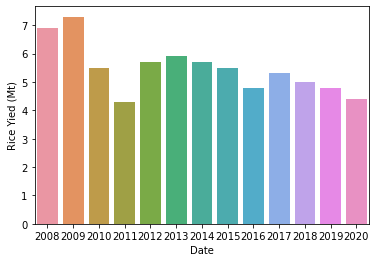

In [13]:
sns.barplot(data=df, x="Date", y="Rice Yied (Mt)")
plt.savefig('save_as_a_png.jpg')

**Scatter Plot for Cotton Yied (Mt)**

<AxesSubplot:xlabel='Date', ylabel='Cotton Yied (Mt)'>

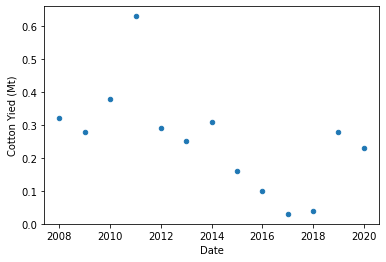

In [14]:
df.plot.scatter(x='Date', y='Cotton Yied (Mt)')
# df.plot.scatter(x='Date', y='Cotton Yied (Mt)',c='Mean temp',colormap='viridis')
# df.plot.scatter(x='Date', y='Cotton Yied (Mt)',c='Priciptation (mm)',colormap='viridis')

**Barchart for Cotton Yied (Mt)**

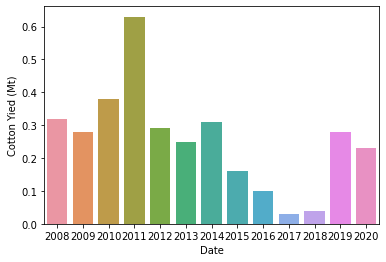

In [15]:
sns.barplot(data=df, x="Date", y="Cotton Yied (Mt)")
plt.savefig('save_as_a_png.jpg')

**Scatter Plot for Moratlity under 5 years (No deaths/1000 births)**

<AxesSubplot:xlabel='Date', ylabel='Moratlity under 5 years (No deaths/1000 births)'>

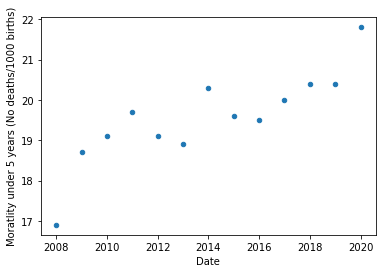

In [16]:
df.plot.scatter(x='Date', y='Moratlity under 5 years (No deaths/1000 births)')
# df.plot.scatter(x='Date', y='Moratlity under 5 years (No deaths/1000 births)',c='Mean temp',colormap='viridis')
# df.plot.scatter(x='Date', y='Moratlity under 5 years (No deaths/1000 births)',c='Priciptation (mm)',colormap='viridis')

**Barchart for Moratlity under 5 years (No deaths/1000 births)**

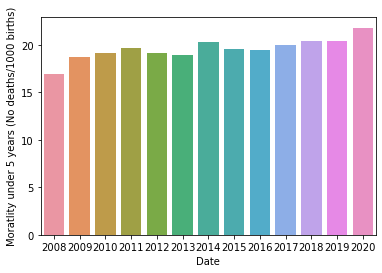

In [17]:
sns.barplot(data=df, x="Date", y="Moratlity under 5 years (No deaths/1000 births)")
plt.savefig('save_as_a_png.jpg')

**Mean, Standard Deviation, Quartiles, Min and Max for each of the Features and Responses**

In [18]:
df.describe()

,Date,Mean temp,Max temp,Mini temp,Priciptation (mm),CO2 (million tone),Sea level (mm),Wheat Yied (Mt),Rice Yied (Mt),Cotton Yied (Mt),Moratlity under 5 years (No deaths/1000 births)
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2014.00000,23.523846,30.870000,16.226923,18.752308,224.898462,80.350769,8.692308,5.469231,0.253846,19.569231
std,3.89444,0.430785,0.429341,0.438452,6.220303,21.048988,16.133475,0.675107,0.882595,0.157191,1.149916
min,2008.00000,22.840000,30.140000,15.590000,10.880000,194.760000,51.480000,7.200000,4.300000,0.030000,16.900000
25%,2011.00000,23.310000,30.710000,15.950000,15.700000,211.420000,76.960000,8.400000,4.800000,0.160000,19.100000
50%,2014.00000,23.420000,30.800000,16.120000,17.650000,224.480000,80.180000,8.600000,5.500000,0.280000,19.600000
75%,2017.00000,23.650000,30.940000,16.400000,21.250000,239.390000,86.620000,9.300000,5.700000,0.310000,20.300000
max,2020.00000,24.560000,31.920000,17.260000,32.740000,260.110000,116.040000,9.600000,7.300000,0.630000,21.800000


# Cumulative Graph for Each Feature and Response with Their Correlations 

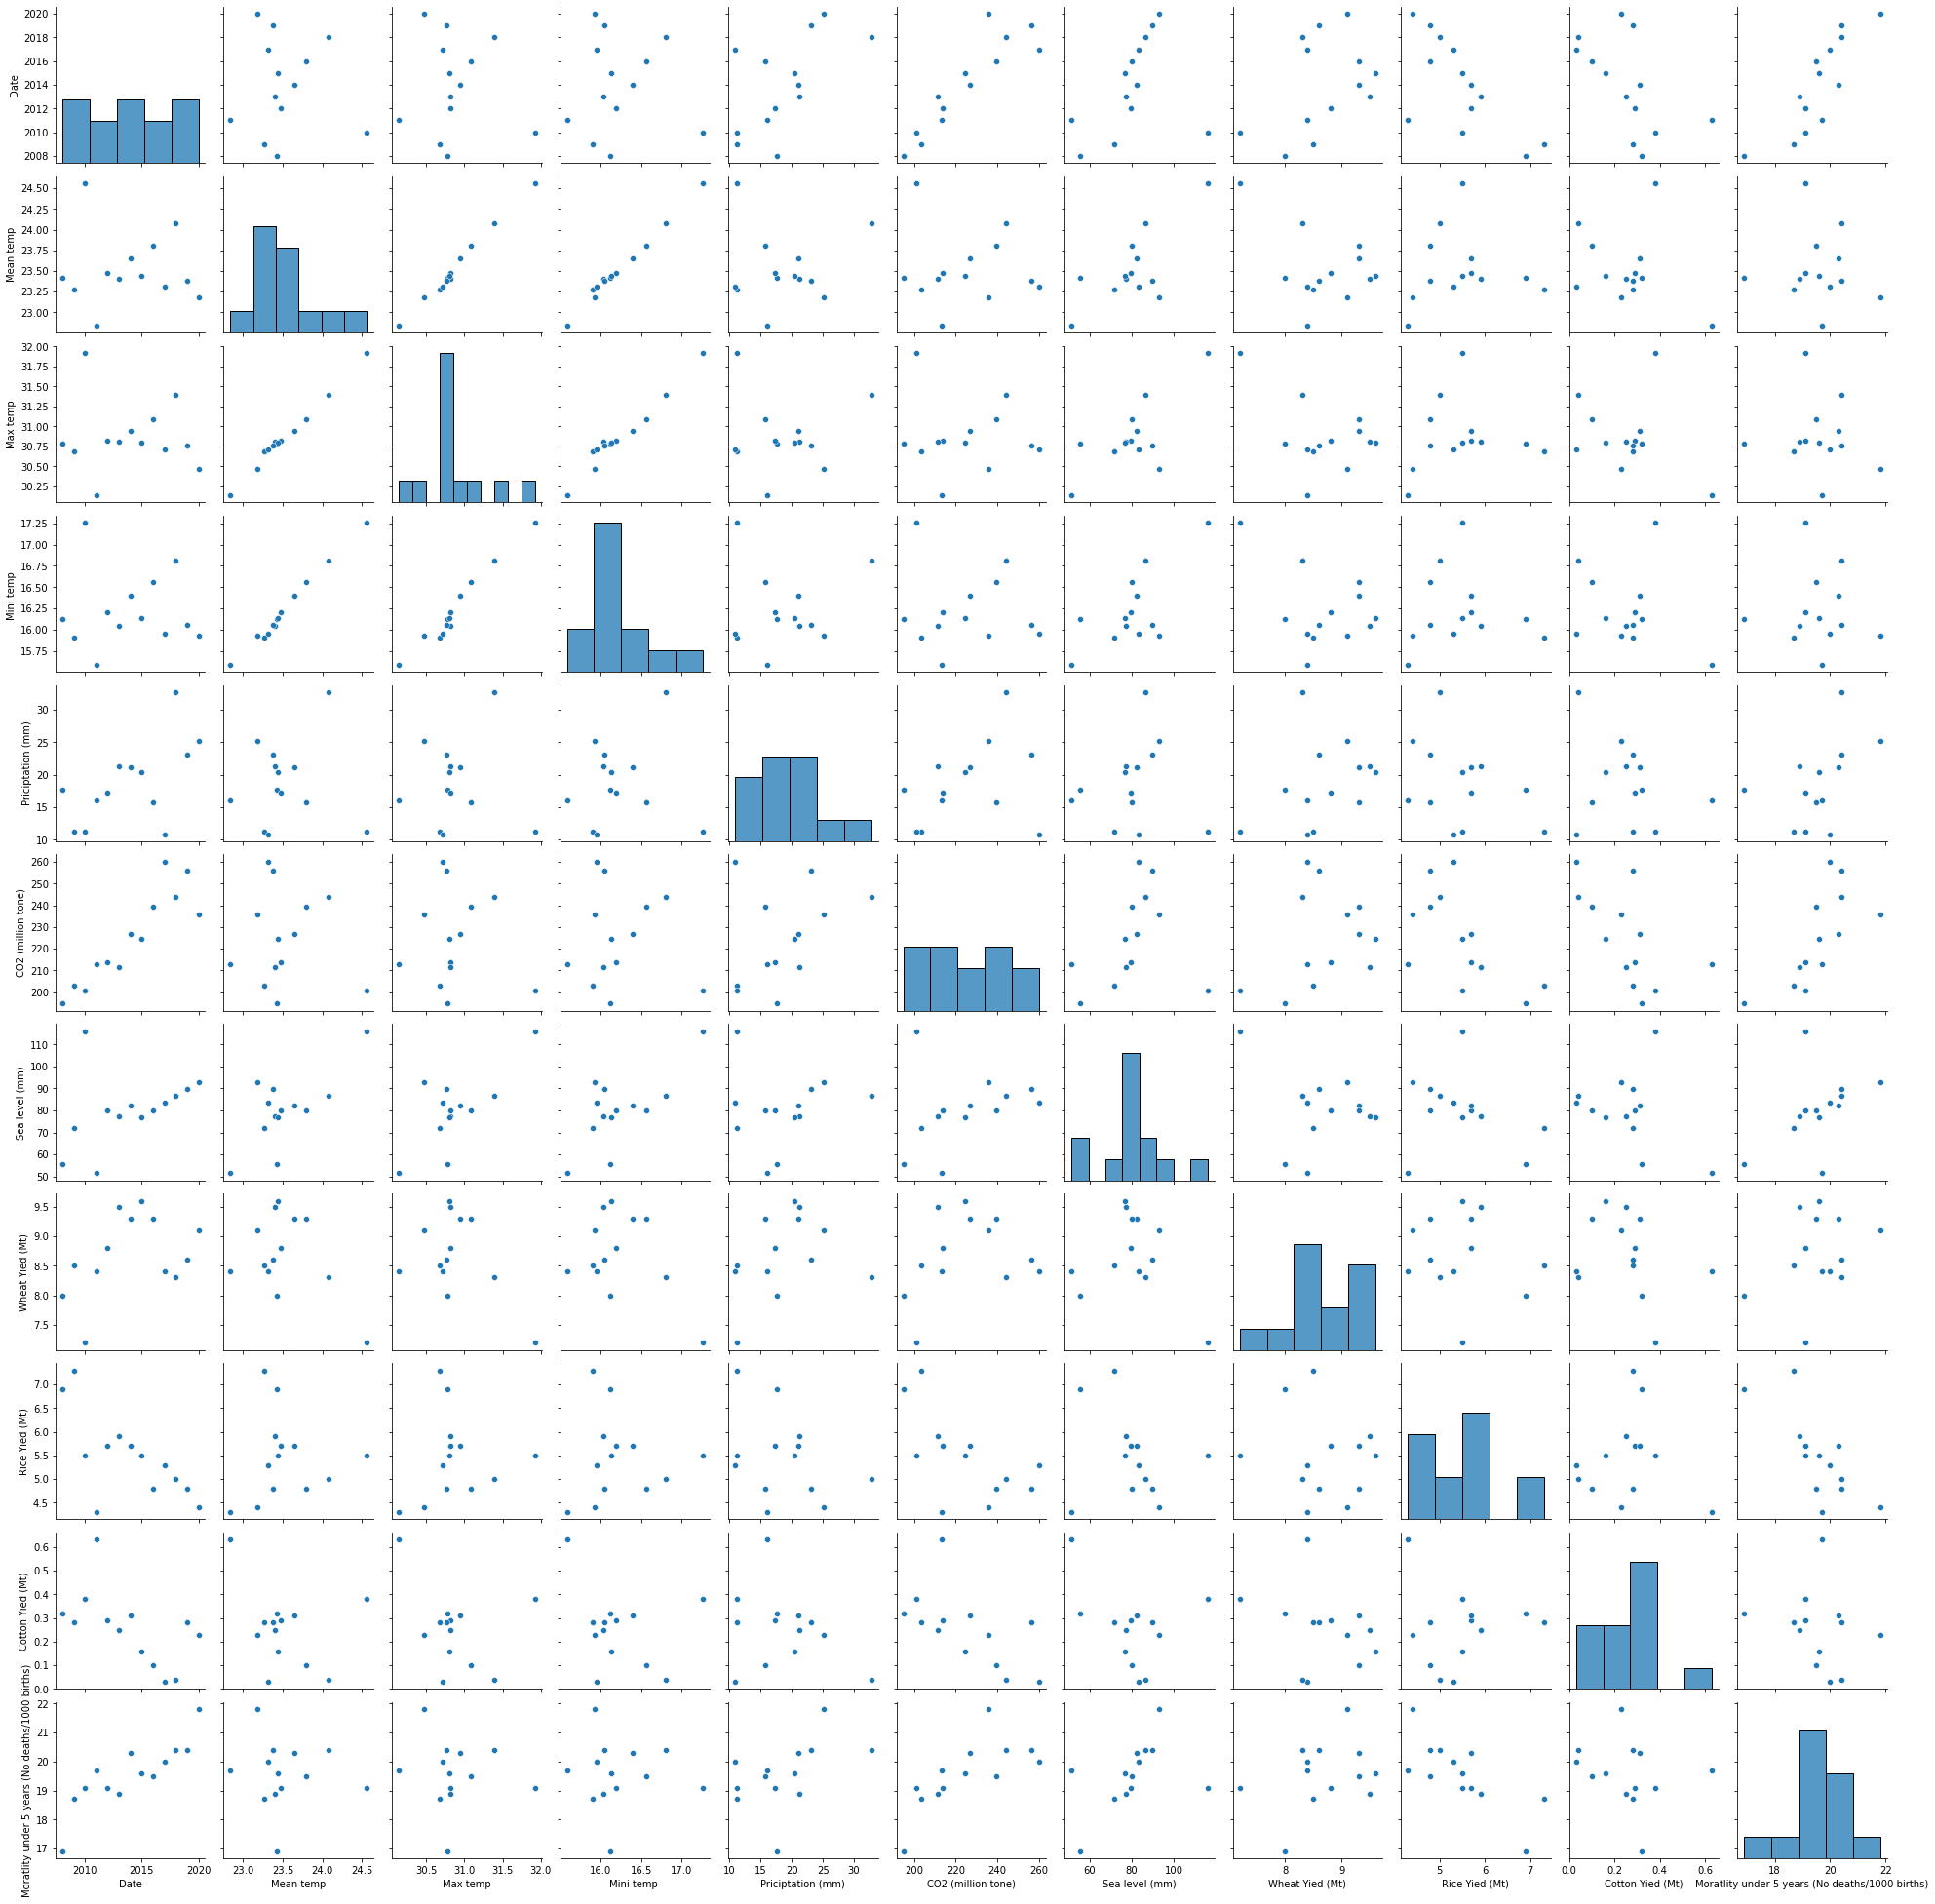

In [19]:
sns.pairplot(df)

In [20]:
# sns.lmplot(data=df, x="Date", y="Sea level (mm)", hue="CO2 (million tone)")

# Splitting our dataset into features and reponses for training our model

In [21]:
# Our features and  responses
X = df.drop(['Date','Sea level (mm)', 
             'Wheat Yied (Mt)', 'Rice Yied (Mt)', 
             'Cotton Yied (Mt)', 'Moratlity under 5 years (No deaths/1000 births)'],
            axis='columns')

y = df[['Sea level (mm)', 'Wheat Yied (Mt)', 
        'Rice Yied (Mt)', 'Cotton Yied (Mt)', 
        'Moratlity under 5 years (No deaths/1000 births)']]
# y = df[['Sea level (mm)']]

In [22]:
# from sklearn import preprocessing
# sx = preprocessing.MinMaxScaler()
# sy = preprocessing.MinMaxScaler()

In [23]:
# scaled_X = sx.fit_transform(X)
# scaled_y = sy.fit_transform(y)

In [24]:
df_pred = pd.read_csv("pred.csv")
df_pred

,Date,Mean temp,Max temp,Mini temp,Priciptation (mm),CO2 (million tone)
0,2021,23.78,31.07,17.41,24.84,249.62
1,2022,23.98,31.27,17.61,24.34,255.51
2,2023,23.88,31.17,17.51,23.84,260.54
3,2024,24.38,31.67,18.01,23.44,265.57
4,2025,24.58,31.87,18.21,22.94,270.60
5,2026,24.68,31.97,18.31,22.44,275.63
6,2027,24.78,32.07,18.41,22.14,280.66
7,2028,24.87,32.16,18.50,21.64,285.69
8,2029,24.88,32.17,18.51,21.14,290.72
9,2030,24.95,32.24,18.58,20.54,295.75


In [25]:
df_pred_X = df_pred.drop(['Date'],
            axis='columns')
df_pred_X = df_pred_X.dropna()

In [26]:
accuracies = {}

In [27]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# train the model
clf = MultiOutputRegressor(RandomForestRegressor(max_depth=2, random_state=0))
clf.fit(X, y)
# predictions
y_pred_rf = clf.predict(df_pred_X)
y_pred_rf

array([[89.49971634,  8.72360516,  5.14461382,  0.16500797, 20.50591825],
       [89.49971634,  8.69110516,  5.14461382,  0.16115797, 20.50591825],
       [89.49971634,  8.71277183,  5.15361382,  0.13151423, 20.38944957],
       [97.66975916,  8.44091071,  5.15361382,  0.13031423, 20.38944957],
       [97.27974234,  8.44091071,  5.15361382,  0.13031423, 20.20721861],
       [97.27974234,  8.44091071,  5.15361382,  0.13031423, 20.18966306],
       [96.47502035,  8.44991071,  5.22061937,  0.13031423, 20.08057576],
       [95.32876619,  8.44291071,  5.24161937,  0.13031423, 20.06129004],
       [95.32876619,  8.44291071,  5.24161937,  0.13031423, 20.06129004],
       [95.08629523,  8.44691071,  5.24161937,  0.12830423, 19.89935909],
       [95.08629523,  8.44691071,  5.24161937,  0.12830423, 19.89935909],
       [95.08629523,  8.44691071,  5.24161937,  0.12830423, 19.89935909],
       [95.08629523,  8.44691071,  5.24161937,  0.12830423, 19.89935909]])

In [28]:
def create_excel_data_frame(data, name):
    df_pred['Sea level (mm)'] = data[:,:1]
    df_pred['Wheat Yied (Mt)'] = data[:,1:2]
    df_pred['Rice Yied (Mt)'] = data[:,2:3]
    df_pred['Cotton Yied (Mt)'] = data[:,3:4]
    df_pred['Moratlity under 5 years (No deaths/1000 births)'] = data[:,4:5]
    df_pred.to_excel(name+".xlsx") 

In [29]:
create_excel_data_frame(y_pred_rf, 'randomforest')

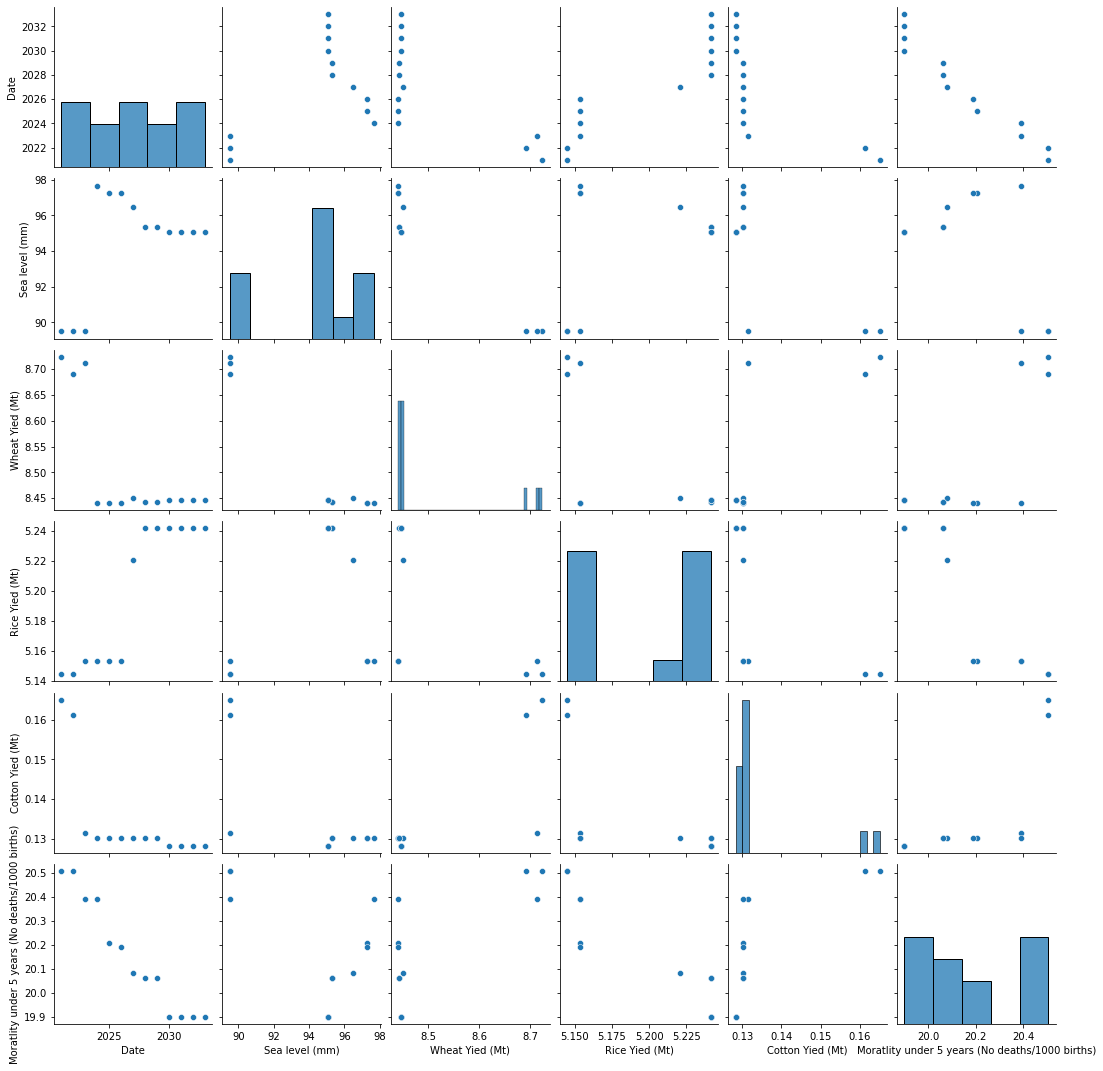

In [30]:
sns.pairplot(df_pred[['Date','Sea level (mm)', 'Wheat Yied (Mt)', 
        'Rice Yied (Mt)', 'Cotton Yied (Mt)', 
        'Moratlity under 5 years (No deaths/1000 births)']])

In [31]:
# train the model
clf = MultiOutputRegressor(linear_model.Ridge(alpha=.5))
clf.fit(X, y)
# predictions
y_pred_rr = clf.predict(df_pred_X)
y_pred_rr

array([[ 9.82768366e+01,  8.69375846e+00,  4.40005804e+00,
         1.15538397e-01,  2.08878578e+01],
       [ 1.05155221e+02,  8.58154792e+00,  4.28864076e+00,
         6.71909736e-02,  2.10397904e+01],
       [ 1.04062636e+02,  8.64993647e+00,  4.17975223e+00,
         5.60845992e-02,  2.11988585e+01],
       [ 1.18420293e+02,  8.35252766e+00,  4.10271711e+00,
        -2.18203998e-02,  2.12901958e+01],
       [ 1.25064493e+02,  8.23643873e+00,  4.01089816e+00,
        -6.62657874e-02,  2.14131567e+01],
       [ 1.29129764e+02,  8.18184230e+00,  3.91338934e+00,
        -9.95981706e-02,  2.15481534e+01],
       [ 1.33148382e+02,  8.13356106e+00,  3.81130904e+00,
        -1.33171750e-01,  2.16921173e+01],
       [ 1.36955761e+02,  8.08511388e+00,  3.71323124e+00,
        -1.65392833e-01,  2.18283175e+01],
       [ 1.38699996e+02,  8.08586069e+00,  3.61060155e+00,
        -1.88723512e-01,  2.19741463e+01],
       [ 1.42014916e+02,  8.04655441e+00,  3.51367152e+00,
        -2.18601396e-01

In [32]:
create_excel_data_frame(y_pred_rr, 'ridge')

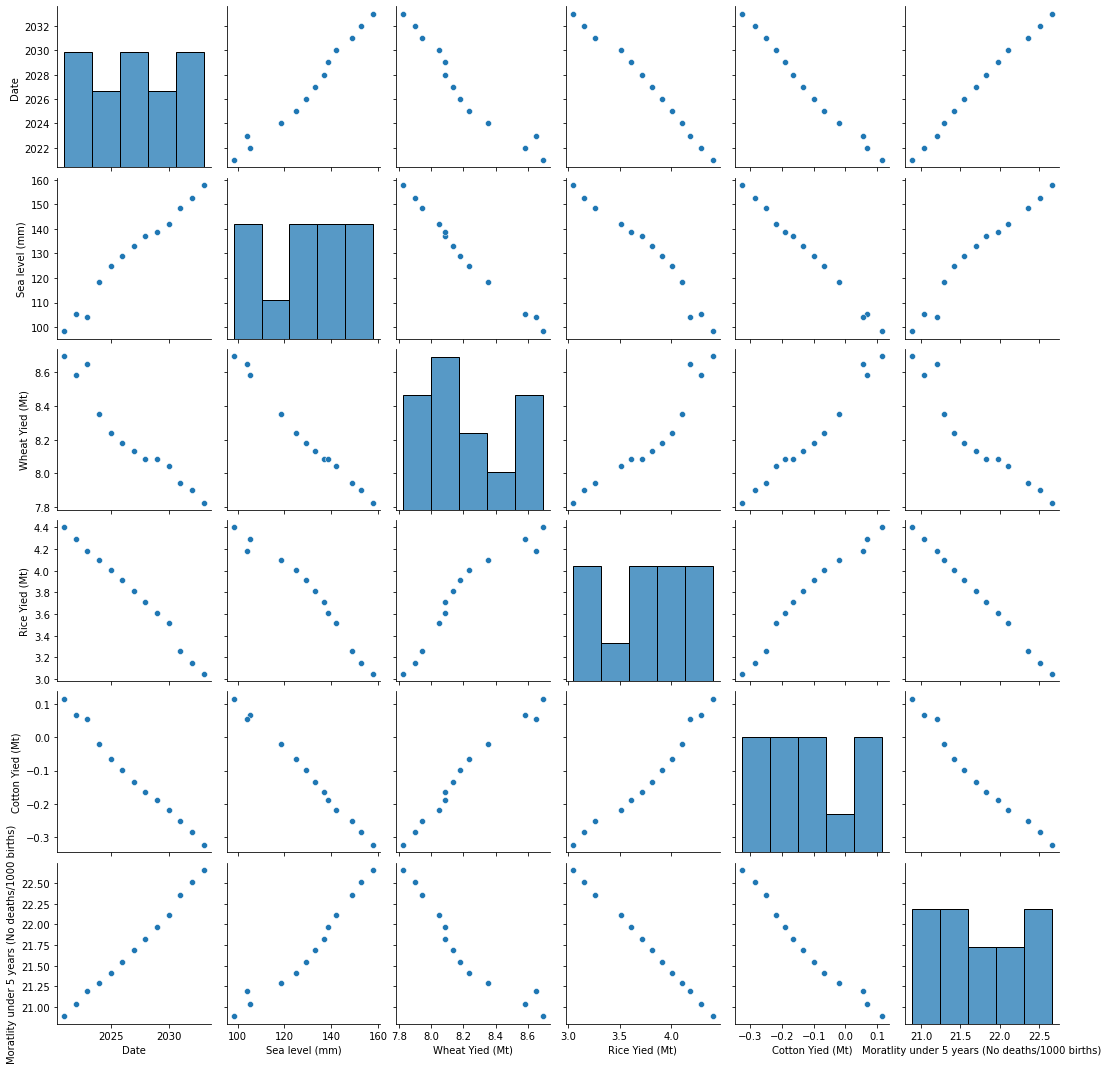

In [33]:
sns.pairplot(df_pred[['Date','Sea level (mm)', 'Wheat Yied (Mt)', 
        'Rice Yied (Mt)', 'Cotton Yied (Mt)', 
        'Moratlity under 5 years (No deaths/1000 births)']])

In [34]:
# train the model
clf = MultiOutputRegressor(linear_model.Lasso(alpha = 0.5))
clf.fit(X, y)
# predictions
y_pred_ll = clf.predict(df_pred_X)
y_pred_ll

array([[ 9.10522910e+01,  8.92413428e+00,  4.83497628e+00,
         1.73034374e-01,  2.06043863e+01],
       [ 9.77086339e+01,  8.95239707e+00,  4.70442447e+00,
         1.53780661e-01,  2.07895324e+01],
       [ 9.66170467e+01,  8.97552368e+00,  4.59370419e+00,
         1.37338187e-01,  2.09453438e+01],
       [ 1.10548079e+02,  9.00003310e+00,  4.48192969e+00,
         1.20895713e-01,  2.11043076e+01],
       [ 1.16975196e+02,  9.02315971e+00,  4.37120941e+00,
         1.04453239e-01,  2.12601191e+01],
       [ 1.20896078e+02,  9.04628631e+00,  4.26048914e+00,
         8.80107653e-02,  2.14159305e+01],
       [ 1.24787384e+02,  9.07217856e+00,  4.14766041e+00,
         7.15682913e-02,  2.15780467e+01],
       [ 1.28457642e+02,  9.09530517e+00,  4.03694013e+00,
         5.51258172e-02,  2.17338581e+01],
       [ 1.30122913e+02,  9.11843177e+00,  3.92621986e+00,
         3.86833432e-02,  2.18896696e+01],
       [ 1.33306714e+02,  9.14017555e+00,  3.81655380e+00,
         2.22408691e-02

In [35]:
create_excel_data_frame(y_pred_ll, 'lasso')

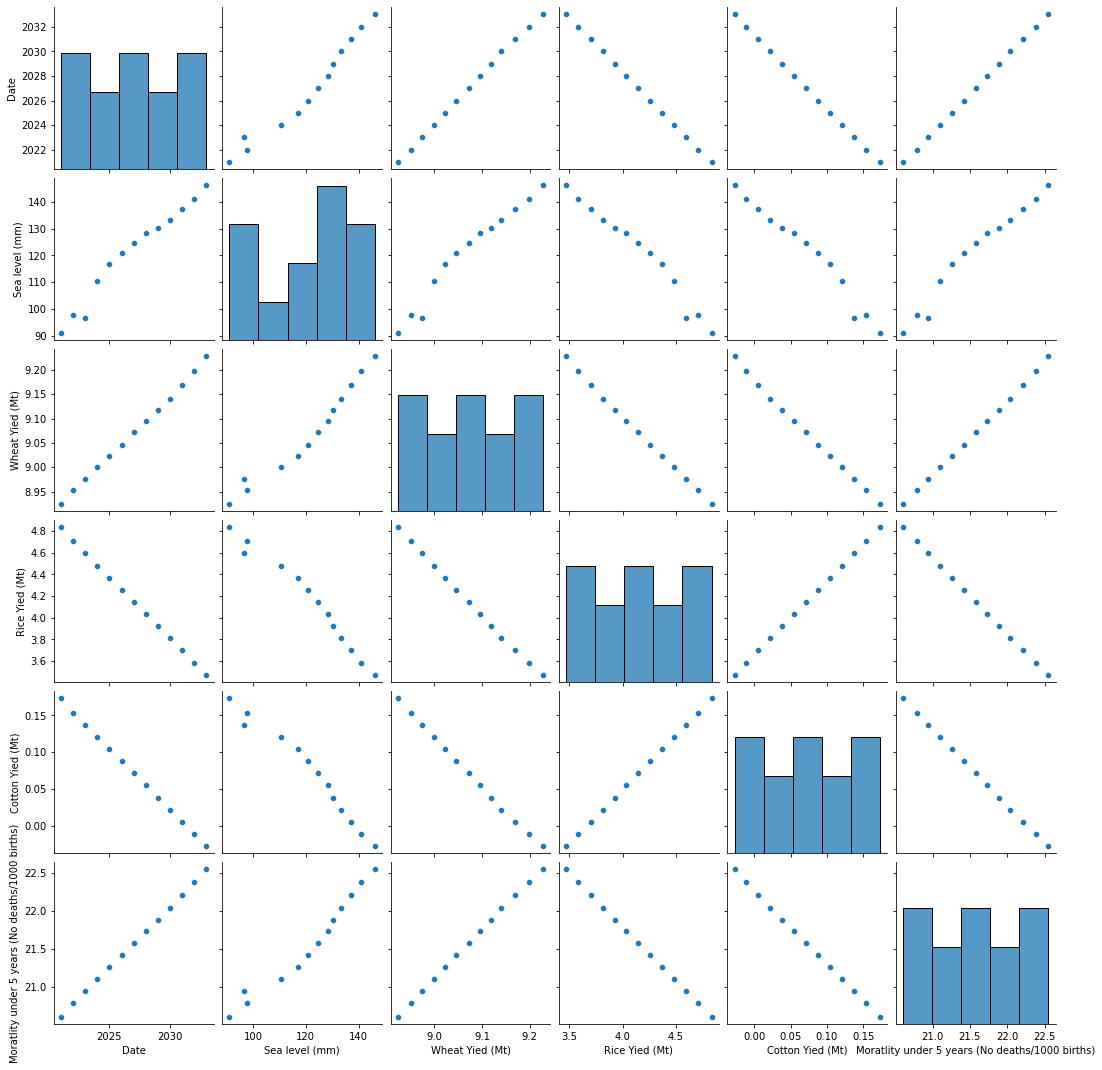

In [36]:
sns.pairplot(df_pred[['Date','Sea level (mm)', 'Wheat Yied (Mt)', 
        'Rice Yied (Mt)', 'Cotton Yied (Mt)', 
        'Moratlity under 5 years (No deaths/1000 births)']])

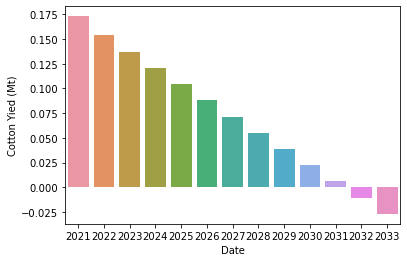

In [37]:
sns.barplot(data=df_pred, x="Date", y="Cotton Yied (Mt)")
plt.savefig('save_as_a_png.jpg')

In [38]:
# train the model
clf = MultiOutputRegressor(LinearRegression())
clf.fit(X, y)
# predictions
y_pred_lin = clf.predict(df_pred_X)
y_pred_lin

array([[-103.93438141,   -4.58008098,  -23.8200923 ,    4.42256832,
         -30.54743337],
       [ -96.75326321,   -4.70997192,  -23.94659069,    4.37487582,
         -30.42731   ],
       [ -98.38062464,   -4.65491392,  -24.11535766,    4.37270569,
         -30.3280247 ],
       [ -82.80229481,   -4.96919123,  -24.14934788,    4.28527797,
         -30.22203646],
       [ -75.81697937,   -5.10007194,  -24.25056476,    4.24062161,
         -30.11989048],
       [ -71.70255622,   -5.16897308,  -24.37429833,    4.21012733,
         -30.01869806],
       [ -67.62745803,   -5.23278998,  -24.49867878,    4.17906277,
         -29.91554246],
       [ -63.80012411,   -5.29549316,  -24.62466402,    4.14998469,
         -29.8144454 ],
       [ -62.26950402,   -5.30861269,  -24.76866262,    4.13223628,
         -29.71411118],
       [ -58.99668608,   -5.36146208,  -24.89882776,    4.10627576,
         -29.61418642],
       [-139.48452748,  -11.23977876,  -37.2417019 ,    5.92687535,
         -51

In [39]:
create_excel_data_frame(y_pred_lin, 'linear')

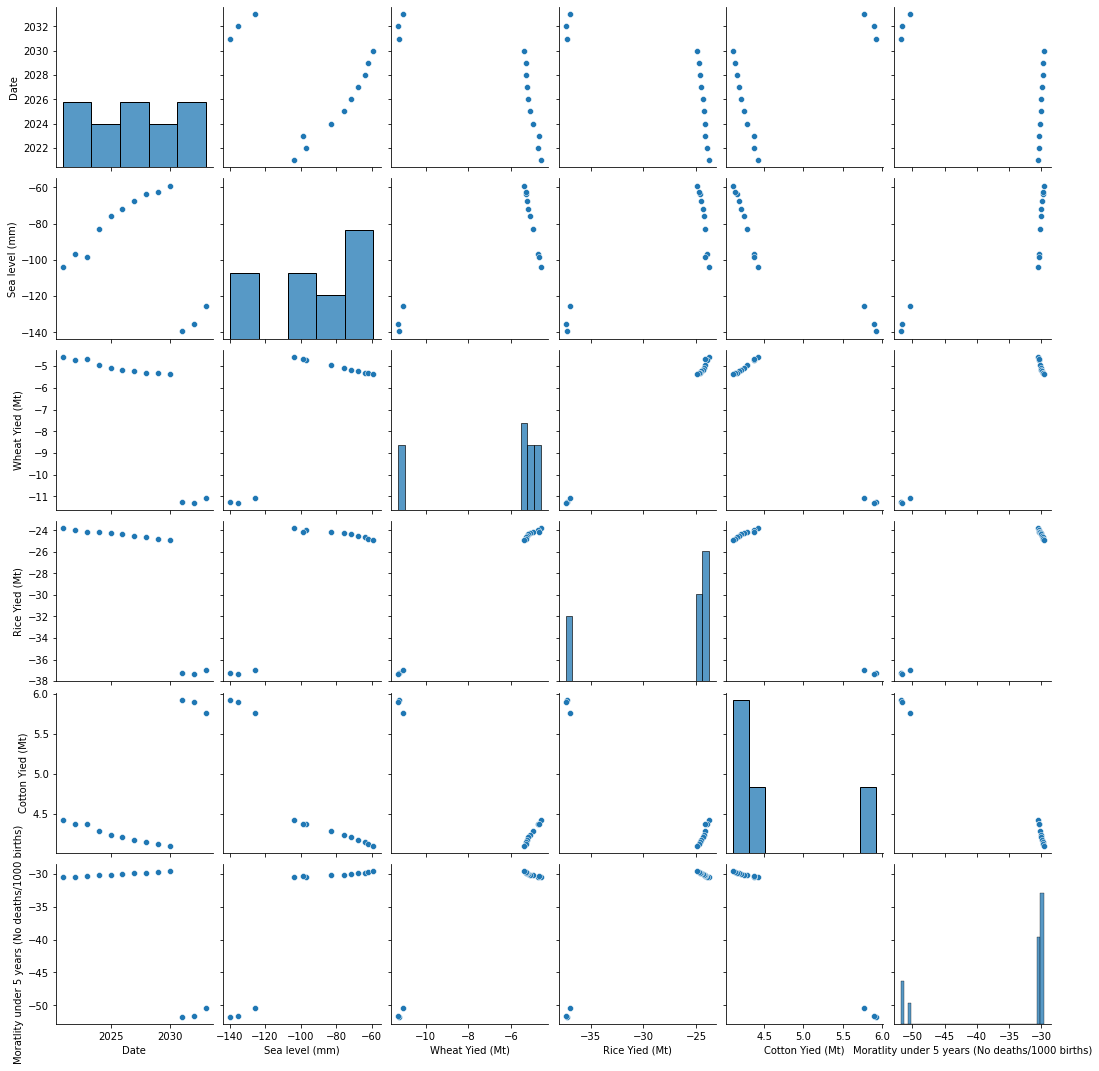

In [40]:
sns.pairplot(df_pred[['Date','Sea level (mm)', 'Wheat Yied (Mt)', 
        'Rice Yied (Mt)', 'Cotton Yied (Mt)', 
        'Moratlity under 5 years (No deaths/1000 births)']])

In [41]:
# train the model
clf = MultiOutputRegressor(linear_model.LassoLars(alpha=.1))
clf.fit(X, y)
# predictions
y_pred_lalars = clf.predict(df_pred_X)
y_pred_lalars

array([[ 9.15714421e+01,  8.97155311e+00,  4.77018575e+00,
         1.48855550e-01,  2.06691767e+01],
       [ 9.87563791e+01,  8.97679252e+00,  4.64648204e+00,
         1.23841142e-01,  2.08474747e+01],
       [ 9.74727209e+01,  8.99997178e+00,  4.54244410e+00,
         1.02479092e-01,  2.09966039e+01],
       [ 1.12638765e+02,  8.98013285e+00,  4.43620937e+00,
         8.11170422e-02,  2.11500279e+01],
       [ 1.19588429e+02,  8.98052837e+00,  4.33217142e+00,
         5.97549923e-02,  2.12991571e+01],
       [ 1.23793652e+02,  8.98851847e+00,  4.22813348e+00,
         3.83929425e-02,  2.14482862e+01],
       [ 1.27964992e+02,  9.00160714e+00,  4.11970197e+00,
         1.70308926e-02,  2.16060052e+01],
       [ 1.31895771e+02,  9.01035670e+00,  4.01566402e+00,
        -4.33115722e-03,  2.17551344e+01],
       [ 1.33630998e+02,  9.02518192e+00,  3.91162608e+00,
        -2.56932071e-02,  2.19042635e+01],
       [ 1.37029831e+02,  9.03290111e+00,  3.80978491e+00,
        -4.70552569e-02

In [42]:
create_excel_data_frame(y_pred_lalars, 'lassolars')

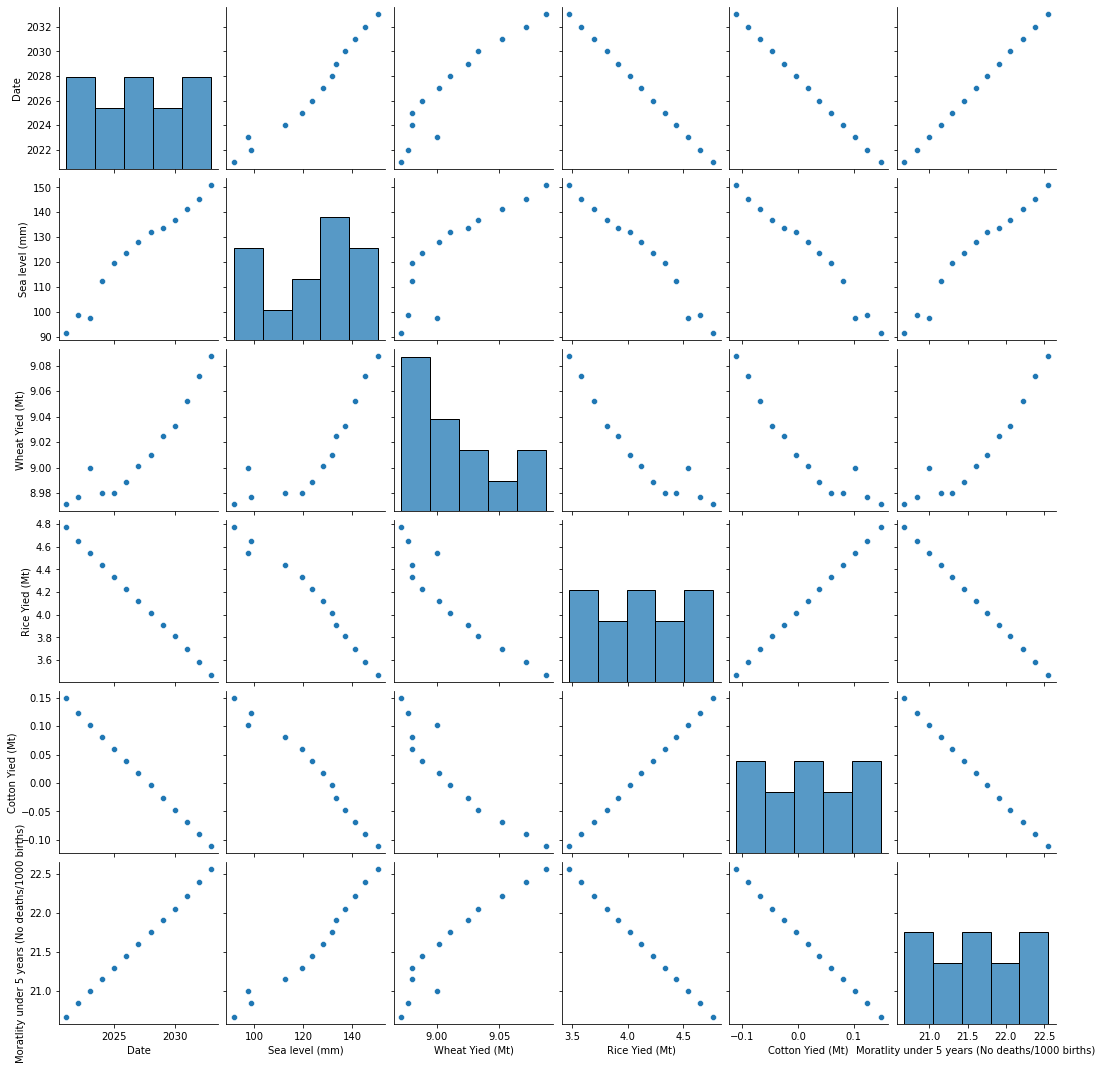

In [43]:
sns.pairplot(df_pred[['Date','Sea level (mm)', 'Wheat Yied (Mt)', 
        'Rice Yied (Mt)', 'Cotton Yied (Mt)', 
        'Moratlity under 5 years (No deaths/1000 births)']])

In [44]:
from sklearn.linear_model import TweedieRegressor

# train the model
clf = MultiOutputRegressor(TweedieRegressor(power=1, alpha=0.5, link='log'))
clf.fit(X, y)
# predictions
y_pred_tr = clf.predict(df_pred_X)
y_pred_tr

array([[9.29922909e+01, 8.68226408e+00, 4.64544194e+00, 1.38650782e-01,
        2.10104310e+01],
       [1.01656712e+02, 8.57155007e+00, 4.54732983e+00, 1.21960289e-01,
        2.11757298e+01],
       [1.00257270e+02, 8.63962329e+00, 4.45963514e+00, 1.12260071e-01,
        2.13494480e+01],
       [1.20699454e+02, 8.34974309e+00, 4.38688772e+00, 9.74249217e-02,
        2.14512425e+01],
       [1.31535310e+02, 8.23947882e+00, 4.30974631e+00, 8.70900358e-02,
        2.15879051e+01],
       [1.38652272e+02, 8.18834202e+00, 4.23151732e+00, 7.86145673e-02,
        2.17386191e+01],
       [1.46083758e+02, 8.14353909e+00, 4.15106862e+00, 7.09164874e-02,
        2.19002639e+01],
       [1.53476303e+02, 8.09871990e+00, 4.07548455e+00, 6.40774752e-02,
        2.20544962e+01],
       [1.57006922e+02, 8.09981789e+00, 3.99942883e+00, 5.83515625e-02,
        2.22205938e+01],
       [1.63897587e+02, 8.06365390e+00, 3.92787329e+00, 5.28449001e-02,
        2.23747485e+01],
       [1.73208034e+02, 7.9631

In [45]:
create_excel_data_frame(y_pred_tr, 'TweedReg')

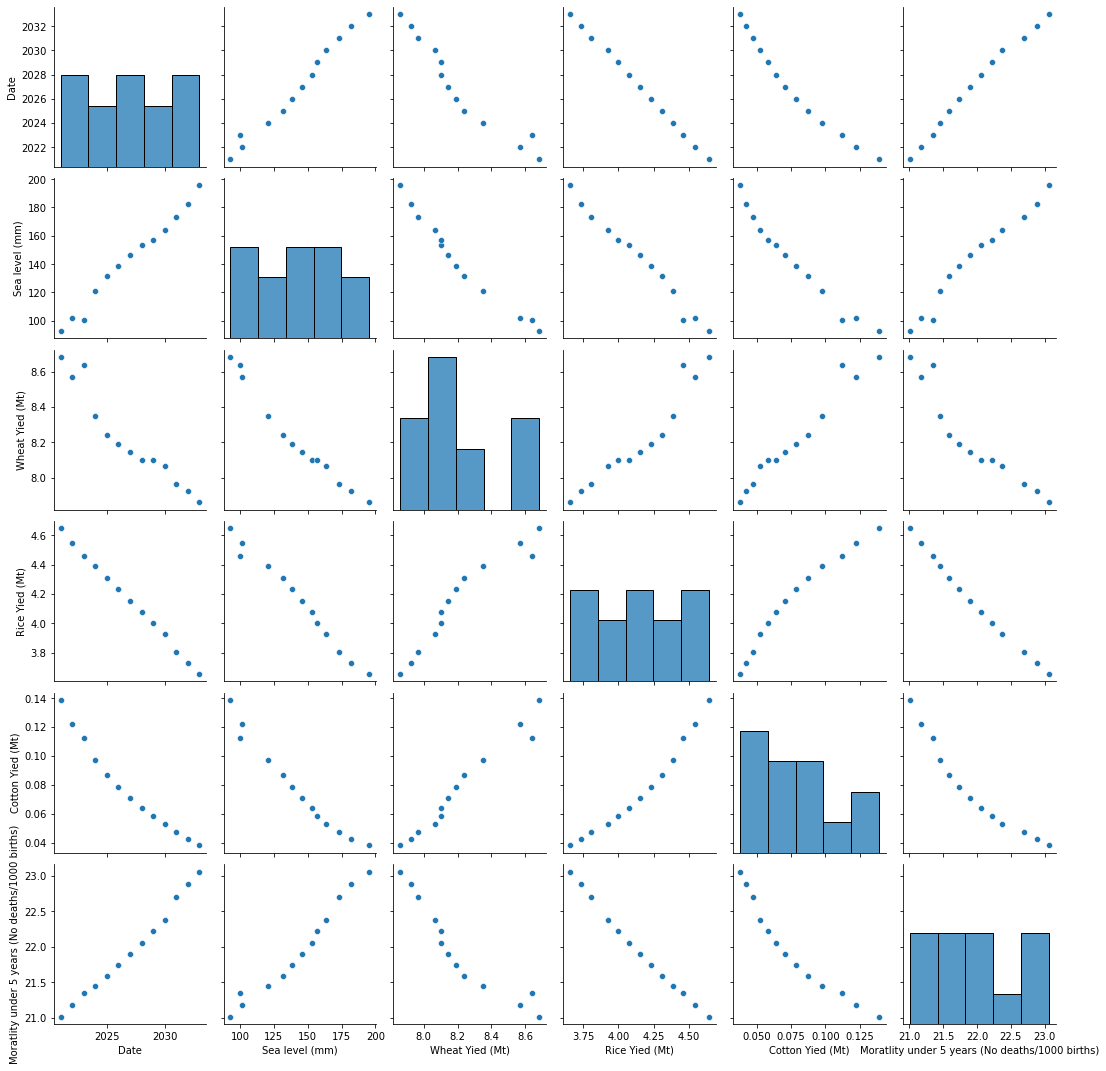

In [46]:
sns.pairplot(df_pred[['Date','Sea level (mm)', 'Wheat Yied (Mt)', 
        'Rice Yied (Mt)', 'Cotton Yied (Mt)', 
        'Moratlity under 5 years (No deaths/1000 births)']])

C:\Users\bahra\AppData\Local\Temp\ipykernel_28044\2268239944.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\bahra\AppData\Local\Temp\ipykernel_28044\2268239944.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\bahra\AppData\Local\Temp\ipykernel_28044\2268239944.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\bahra\AppData\Local\Temp\ipykernel_28044\2268239944.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\bahra\AppData\Local\Temp\ipykernel_28044\2268239944.py:32: FutureWarnin

                              MAE        MSE      RMSE       R^2
Model                                                           
Ridge                    1.851392  18.913359  4.348949  0.472913
Lasso                    1.799559  19.279638  4.390859   0.36347
Tweedie Regressor        1.988171  29.961322  5.473694  0.397065
Lasso Lars               1.799559  19.279639  4.390859   0.36347
Linear Regression        1.733717  17.702465   4.20743  0.579285
Random Forest Regressor  1.021134   7.869373   2.80524  0.853577


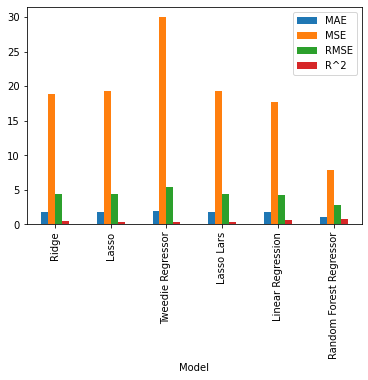

In [47]:

from math import sqrt
# Create a list of models to evaluate
models = [
    ('Ridge', MultiOutputRegressor(linear_model.Ridge())),
    ('Lasso', MultiOutputRegressor(linear_model.Lasso())),
    ('Tweedie Regressor', MultiOutputRegressor(TweedieRegressor())),
    ('Lasso Lars',MultiOutputRegressor(linear_model.LassoLars())),
    ('Linear Regression',MultiOutputRegressor(LinearRegression())),
    ('Random Forest Regressor',MultiOutputRegressor(RandomForestRegressor()))
    
    
]

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R^2'])

# Evaluate each model
for name, model in models:
    # Fit the model
    model.fit(X, y)

    # Make predictions on the test set
    y_pred = model.predict(X)

    # Calculate evaluation metrics for each output dimension
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y, y_pred)

    # Store the results
    results = results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r2
    }, ignore_index=True)

# Set the index to the model name
results.set_index('Model', inplace=True)

# Display the results
print(results)

# Plot the results
results.plot(kind='bar')
plt.show()